In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Declare Missing Value , Read Dataset, Replace target attribute values

In [4]:
missing_values = ["n/a", "?", "na", "--"]
df = pd.read_csv('C:/Users/Md Monir/Documents/Jupyter Lab/DataSets/heart diseases.csv',na_values = missing_values)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
df['num'].replace({
    2: 1,
    3: 1,
    4: 1
}, inplace=True)

# Null Value Maintain

In [6]:
import math
ca_null_value = math.ceil(df.ca.mean())
ca_null_value

1

In [7]:
thal_null_value = math.ceil(df.thal.mean())
thal_null_value

5

In [8]:
df.ca.fillna(ca_null_value, inplace = True)
df.thal.fillna(thal_null_value, inplace = True)

In [9]:
df.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# Separete X and Y

In [10]:
#X = data.iloc[:,0:34]  # independent columns
#y = data.iloc[:,1]   # target column i.e Attrition
x = df.drop(['num'], axis=1)
y = df['num']

In [11]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [12]:
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: num, Length: 303, dtype: int64

# Feature Selection ( Feature Importance )

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [14]:
print(model.feature_importances_)  #use inbuilt class feature_importances of tree based classifiers

[0.06954239 0.04315618 0.11208888 0.0615316  0.06158404 0.01953431
 0.03489492 0.08273514 0.09130514 0.08326897 0.05981246 0.12652145
 0.15402453]


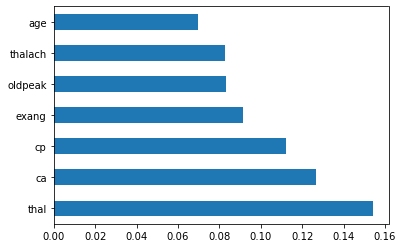

In [15]:
#plot graph of feature importances for better visualization
feat_impotances = pd.Series(model.feature_importances_, index = x.columns)
feat_impotances.nlargest(7).plot(kind='barh')
plt.show()

# Univariate Selection

In [16]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

In [17]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [18]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [19]:
featureScores

,Specs,Score
0,age,22.562319
1,sex,7.432845
2,cp,15.140160
3,trestbps,16.159096
4,chol,23.802935
5,fbs,0.164669
6,restecg,8.644897
7,thalach,183.821471
8,exang,38.052613
9,oldpeak,70.572550


In [20]:
print(featureScores.nlargest(13,'Score'))  #print 10 best features

       Specs       Score
7    thalach  183.821471
11        ca   80.361904
9    oldpeak   70.572550
12      thal   65.441147
8      exang   38.052613
4       chol   23.802935
0        age   22.562319
3   trestbps   16.159096
2         cp   15.140160
6    restecg    8.644897
10     slope    8.243914
1        sex    7.432845
5        fbs    0.164669


# Correlation Matrix with Heatmap

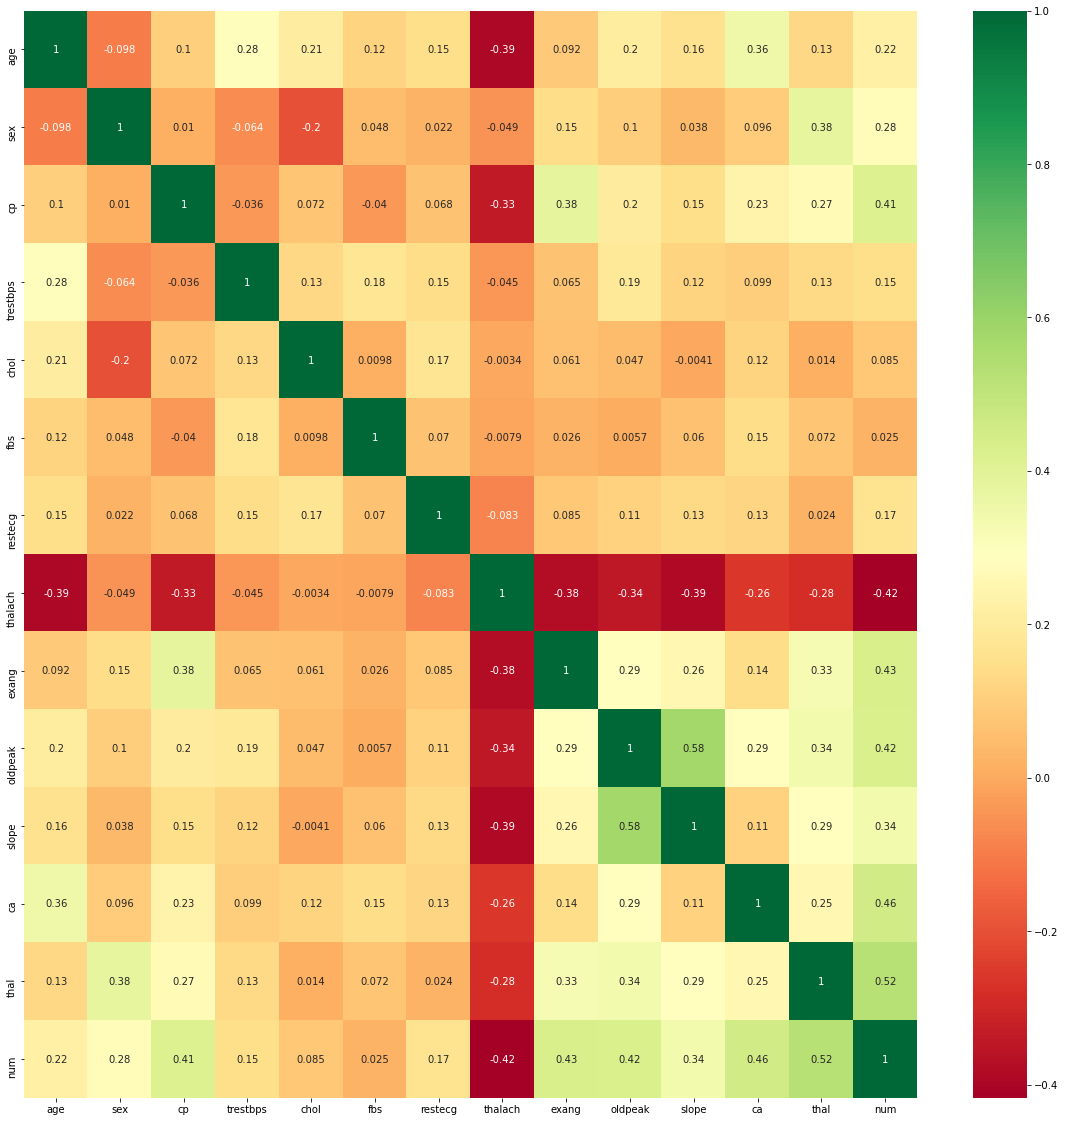

In [21]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Specify the target variable and predictor variables

In [23]:
# predictor variables
x = df.drop(['num','restecg','slope','sex','fbs'], axis =1 ) 
x

,age,cp,trestbps,chol,thalach,exang,oldpeak,ca,thal
0,63,1,145,233,150,0,2.3,0.0,6.0
1,67,4,160,286,108,1,1.5,3.0,3.0
2,67,4,120,229,129,1,2.6,2.0,7.0
3,37,3,130,250,187,0,3.5,0.0,3.0
4,41,2,130,204,172,0,1.4,0.0,3.0
...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,132,0,1.2,0.0,7.0
299,68,4,144,193,141,0,3.4,2.0,7.0
300,57,4,130,131,115,1,1.2,1.0,7.0
301,57,2,130,236,174,0,0.0,1.0,3.0


In [25]:
# target variable
y = df['num'] 
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: num, Length: 303, dtype: int64

# Split dataset into training and test data

In [26]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=7)

In [27]:
# Balanced split of the dataset
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.4, random_state=7, stratify=y)

# Random Forest Classifier mode

In [28]:
# ML Algroithm
from sklearn.ensemble import RandomForestClassifier
Rclf = RandomForestClassifier()
Rclf.fit(xtrain, ytrain)

RandomForestClassifier()

In [33]:
# make predictions on training data
predictions_train = Rclf.predict(xtrain)
print('\nTraining Accuracy :', accuracy_score(ytrain,predictions_train))
# make predictions on test data
predictions_test = Rclf.predict(xtest)
print('\nTest Accuracy :', accuracy_score(ytest, predictions_test))


Training Accuracy : 1.0

Test Accuracy : 0.819672131147541
